# The prediction about None-Bayes SegNet with MaSTr1325

## Ground Truth of 001 image in Validation Dataset

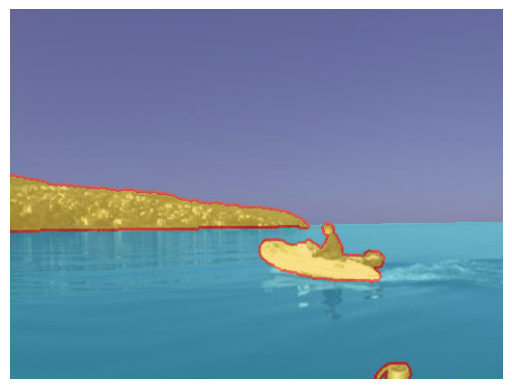

In [39]:
import os
from PIL import Image
import numpy as np
import json
import matplotlib.pyplot as plt

# Path
img_number = '001'
root = os.path.expanduser("~/BDL/BDL-based-semantic-segmentation")
jpg_path = os.path.join(root, f'Dataset/MaSTr1325/val/{img_number}.jpg')
png_path = os.path.join(root, f'Dataset/MaSTr1325/val_mask/{img_number}m.png')

# Define Colour
i = 64
colors = {
    0: (247, 195, 37, 128),    # yellow (RGBA) = obstacle & environment
    1: (41, 167, 224, 128),    # cyan-blue (RGBA) = water
    2: (90, 75, 164, 128),     # purple (RGBA) = sky
    4: (255, 0, 0, 128)       # red (RGBA) = unknown
}

image = Image.open(jpg_path).convert('RGBA')
mask_data = Image.open(png_path)
mask_array = np.array(mask_data)
mask_image = Image.new('RGBA', image.size)
mask_pixels = mask_image.load()

for y in range(mask_array.shape[0]):
    for x in range(mask_array.shape[1]):
        value = mask_array[y, x]
        if value in colors:
            mask_pixels[x, y] = colors[value]

# apply mask to jpg
combined = Image.alpha_composite(image, mask_image)
    
plt.imshow(combined)
# plt.imshow(mask_image)
plt.axis('off') 
plt.show()


# Testing Result
![avater](./result/testing/001.png)

# Convergence Curve IOU vs Dice Coefficiency
$$
\text{IOU} = \frac{\text{Area of Intersection}}{\text{Area of Union}} = \frac{\text{ground truth} \cap \text{prediction}}{\text{ground truth} \cup \text{prediction}}
$$
<br>

$$
\text{Dice-Sørensen} = \frac{2 \times |\text{ground truth} \cap \text{prediction}|}{|\text{ground truth}| + |\text{prediction}|}
$$

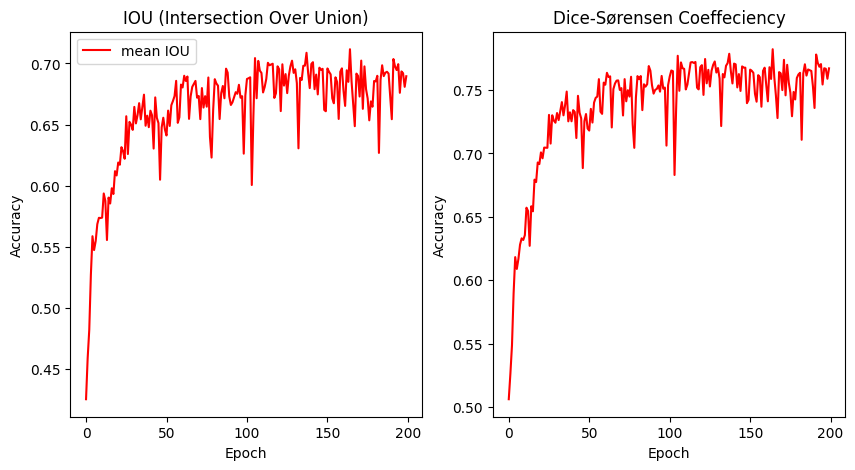

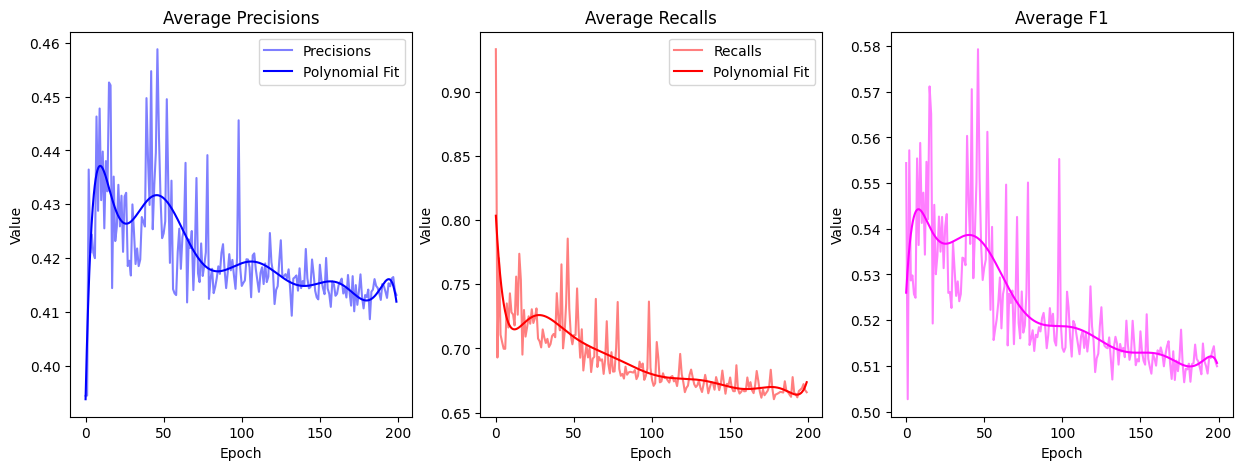

In [40]:
import json
import numpy as np
import matplotlib.pyplot as plt

def evaluation_show(data):
        aver_iou = np.array([item['aver_iou'] for item in data])
        aver_dice = np.array([item['aver_dice'] for item in data])
        Prs = 5*np.array([item['Prs'] for item in data])
        Res = 2*np.array([item['Res'] for item in data])
        # F1 = np.array([item['F1'] for item in data])
        F1 = 2*(Prs*Res)/(Prs+Res)

        # Polynomial Smoothing
        x = np.arange(len(data))
        Prs_sm = np.poly1d(np.polyfit(x, Prs, 10))
        Res_sm = np.poly1d(np.polyfit(x, Res, 10))
        F1_sm = np.poly1d(np.polyfit(x, F1, 10))
        x_sm = np.linspace(x.min(), x.max(), 10*len(data))
        Prs_sm = Prs_sm(x_sm)
        Res_sm = Res_sm(x_sm)
        F1_sm = F1_sm(x_sm)

        # Plot figure 1 for iou and dice
        plt.figure(figsize=(10, 5))
        # plot average iou
        plt.subplot(1, 2, 1)
        plt.plot(aver_iou, label='mean IOU', color='red')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('IOU (Intersection Over Union)')
        plt.legend()
        # plot average dice
        plt.subplot(1, 2, 2)
        plt.plot(aver_dice, label='mean Dice', color='red')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Dice-Sørensen Coeffeciency')
        plt.show()

        # Plot figure 2 for precision / recalls / F1
        plt.figure(figsize=(15, 5))
        # plot average precision
        plt.subplot(1, 3, 1)
        plt.plot(Prs, label='Precisions', color='blue', alpha = 0.5)
        plt.plot(x_sm, Prs_sm, label='Polynomial Fit', color='blue')
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Average Precisions')
        plt.legend()
        # plot average recall
        plt.subplot(1, 3, 2)
        plt.plot(Res, label='Recalls', color='red', alpha = 0.5)
        plt.plot(x_sm, Res_sm, label='Polynomial Fit', color='red')
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Average Recalls')
        plt.legend()
        # plot average F1
        plt.subplot(1, 3, 3)
        plt.plot(F1, label='F1', color='#FF00FF', alpha = 0.5)
        plt.plot(x_sm, F1_sm, label='Polynomial Fit', color='#FF00FF')
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Average F1')
        plt.show()

with open('result/validation-epoch200.json', 'r') as file:
        data = json.load(file)
evaluation_show(data)


# Training Loss
![avater](result/training/loss_segnet_1_MaSTr1325_100.jpg)
![avater](result/training/loss_segnet_1_MaSTr1325_200.jpg)